EDA PROYECTO INDIVIDUAL NUMERO 2 - DATA ANALYST

In [1]:
#Importo las librerias que voy a utilizar

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Descargo el CSV S&P 500 general como un DF de Pandas

gspc = yf.download(tickers="^GSPC", start="2000-01-01", end="2023-02-23")
gspc.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [3]:
# Creo un ID que sirva como indice

gspc.reset_index(inplace=True)
gspc['Id'] = gspc.index

# Cambio el campo Date a formato Datetime

gspc['Date'] = pd.to_datetime(gspc['Date'])

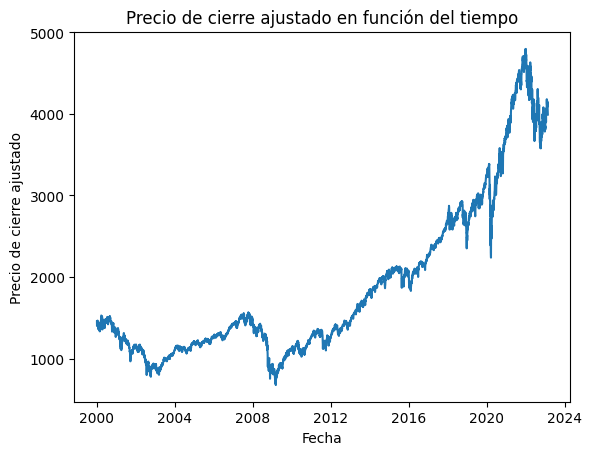

In [4]:
#Sigo los siguentes pasos para obtener un grafico que me permita ver como evoluciono el indice a traves del tiempo

# Crear el gráfico de líneas
plt.plot(gspc['Date'], gspc['Adj Close'])

# Añadir etiquetas al gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')
plt.title('Precio de cierre ajustado en función del tiempo')

# Mostrar el gráfico
plt.show()

In [5]:
# Agrego una columna con el cambio porcentual diario del indice

gspc['returns'] = gspc['Close'].pct_change()


In [6]:
# Descargo los CSV del S&P 500 separado por los 11 sectores para el mismo periodo de tiempo

#S&P 500 Consumer Discretionary (Sector) (^SP500-25)

cond = yf.download(tickers="^SP500-25", start="2000-01-01", end="2023-02-23")

# S&P 500 Consumer Staples (Sector) (^SP500-30)

cons = yf.download(tickers="^SP500-30", start="2000-01-01", end="2023-02-23")

# S&P 500 Energy (Sector) (^GSPE)

enrs = yf.download(tickers="^GSPE", start="2000-01-01", end="2023-02-23")

# S&P 500 Financials (Sector) (^SP500-40)

finl = yf.download(tickers="^SP500-40", start="2000-01-01", end="2023-02-23")

# S&P 500 Health Care (Sector) (^SP500-35)

hlth = yf.download(tickers="^SP500-35", start="2000-01-01", end="2023-02-23")

# S&P 500 Industrials (Sector) (^SP500-20)

indu = yf.download(tickers="^SP500-20", start="2000-01-01", end="2023-02-23")

# S&P 500 Information Technology (Sector) (^SP500-45)

inft = yf.download(tickers="^SP500-45", start="2000-01-01", end="2023-02-23")

# S&P 500 Materials (Sector) (^SP500-15)

matr = yf.download(tickers="^SP500-15", start="2000-01-01", end="2023-02-23")

# S&P 500 Real Estate (Sector) (^SP500-60)

real = yf.download(tickers="^SP500-60", start="2000-01-01", end="2023-02-23")

# S&P 500 Telecommunication Services (Sector) (^SP500-50)

tels = yf.download(tickers="^SP500-50", start="2000-01-01", end="2023-02-23")

# S&P 500 Utilities (Sector) (^SP500-55)

util = yf.download(tickers="^SP500-55", start="2000-01-01", end="2023-02-23")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:

# Creo la funcion para acomodar los indices y el formato Datetime

def prepare_dataframe(df, df_name):
    """
    Esta función recibe un DataFrame con una columna 'Date' como índice, crea un nuevo índice
    numérico con el nombre 'Id_<nombre del DataFrame>', resetea el índice y convierte la columna
    'Date' a formato datetime.
    
    Args:
    - df: DataFrame con una columna 'Date' como índice.
    - df_name: Nombre del DataFrame.
    
    Returns:
    - df: DataFrame con un nuevo índice numérico con el nombre 'Id_<nombre del DataFrame>',
          el índice reseteado y la columna 'Date' en formato datetime.
    """
    # Crear el nuevo índice numérico con el nombre 'Id_<nombre del DataFrame>'
    df[f'Id_{df_name}'] = range(len(df))

    # Resetear el índice actual y mover la columna 'Date' a una columna
    df.reset_index(inplace=True)

    # Convertir la columna 'Date' a formato datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Establecer el nuevo índice con el nombre 'Id_<nombre del DataFrame>'
    df.set_index(f'Id_{df_name}', inplace=True)

    return df

In [8]:
# Aplico la funcion a los 11 Dataframes

prepare_dataframe(cond,'cond')
prepare_dataframe(cons,'cons')
prepare_dataframe(enrs,'enrs')
prepare_dataframe(finl,'finl')
prepare_dataframe(hlth,'hlth')
prepare_dataframe(indu,'indu')
prepare_dataframe(inft,'inft')
prepare_dataframe(matr,'matr')
prepare_dataframe(real,'real')
prepare_dataframe(tels,'tels')
prepare_dataframe(util,'util')

,Date,Open,High,Low,Close,Adj Close,Volume
Id_util,,,,,,,
0,2000-01-03,138.750000,138.750000,138.750000,138.750000,138.750000,0
1,2000-01-04,138.910004,138.910004,138.910004,138.910004,138.910004,0
2,2000-01-05,144.080002,144.080002,144.080002,144.080002,144.080002,0
3,2000-01-06,146.089996,146.089996,146.089996,146.089996,146.089996,0
4,2000-01-07,148.389999,148.389999,148.389999,148.389999,148.389999,0
...,...,...,...,...,...,...,...
5814,2023-02-15,342.399994,346.529999,342.399994,346.290009,346.290009,83910900
5815,2023-02-16,342.329987,344.959991,339.750000,343.420013,343.420013,94386300
5816,2023-02-17,343.809998,348.329987,341.540009,346.850006,346.850006,112310500


In [9]:
# Creo un diccionario para los DF y sus nombres

dataframes_dict = {'Consumo discrecional': cond,
                    'Consumo basico': cons,
                      'Energia': enrs,
                       'Sector Financiero': finl,
                        'Salud': hlth,
                         'Industria': indu,
                          'Tecnologia de la informacion':inft,
                          'Materiales':matr,
                          'Inmobiliario':real,
                          'Comunicacion':tels,
                          'Servicios Publicos':util

                            }

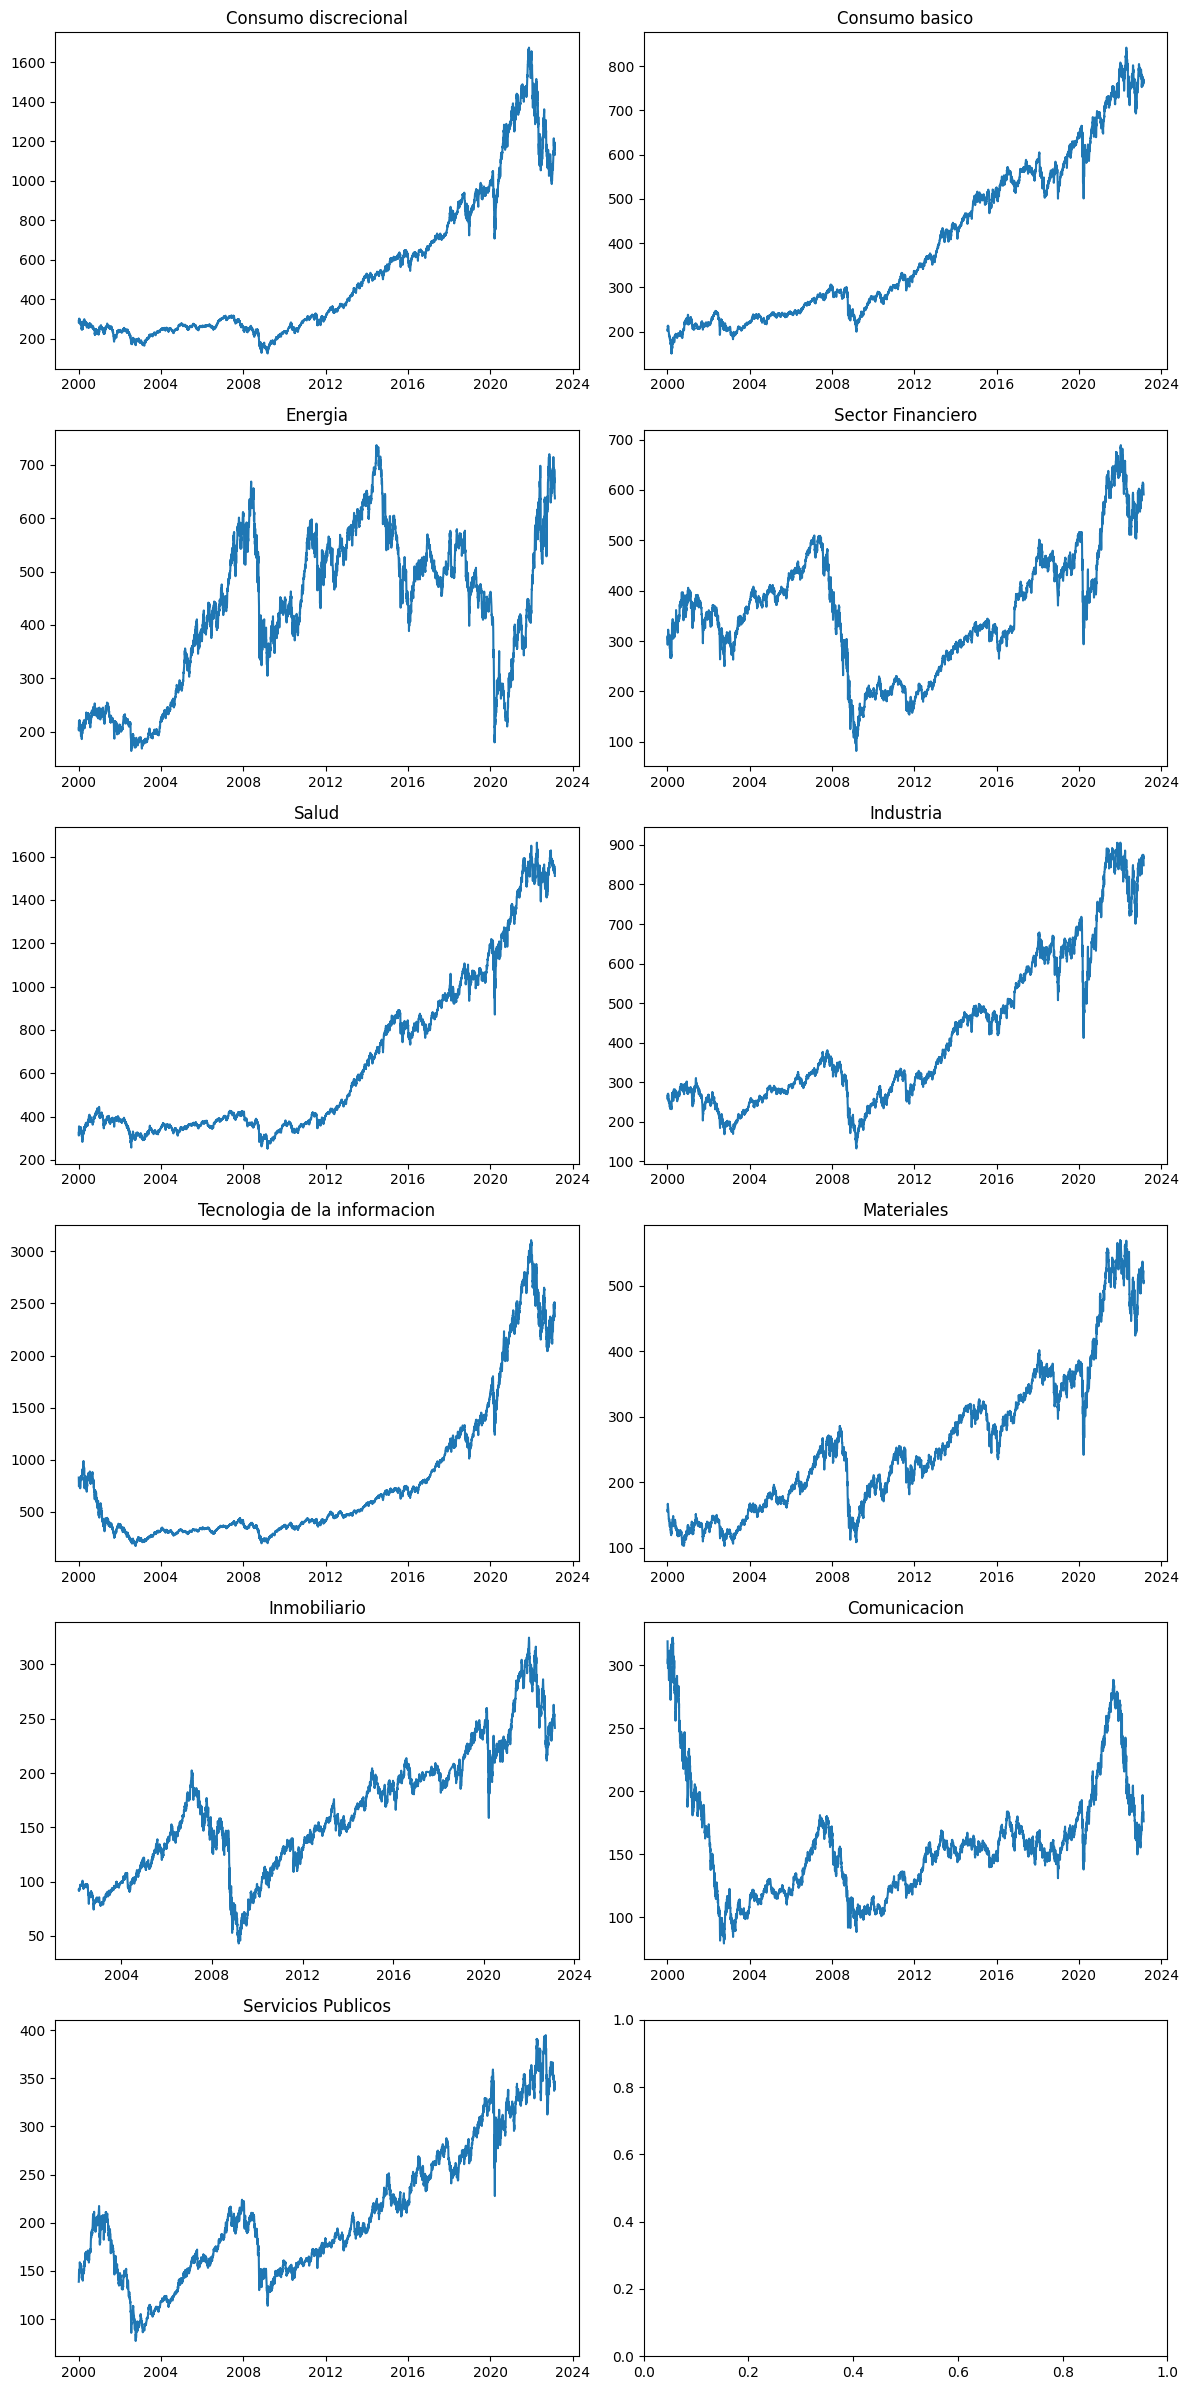

In [10]:
# Con ese diccionario voy a graficar los 11 indices para analizar sus movimientos y la relacion con el S&P 500 general

fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(12, 24))

for i, (name, df) in enumerate(dataframes_dict.items()):
    row = i // 2
    col = i % 2
    axs[row, col].plot(df['Date'], df['Adj Close'])
    axs[row, col].set_title(name)  # Título igual al nombre del DataFrame

plt.tight_layout()
plt.show()

In [11]:
# Agrego una columna que indique el nombre para cada sector

for name, df in dataframes_dict.items():
    df['sector'] = name

In [13]:
# Creo una lista de los 11 Dataframes

lista = [cond,cons,enrs,finl,hlth,indu,inft,matr,real,tels,util]

# Uso esa lista para concatenarlos en un solo Dataframe

Sp500_por_sectores =  pd.concat(lista, ignore_index=True)

In [15]:
# Para Tecnologia, Materiales y Consumo Basico voy a calcular la variacion diaria

inft['Daily Return'] = inft['Close'].pct_change()
matr['Daily Return'] = matr['Close'].pct_change()
cons['Daily Return'] = cons['Close'].pct_change()

In [16]:
# Con la variacion diaria voy a calcular el indice de volatilidad a 180 Dias

inft['Volatility'] = inft['Daily Return'].rolling(window=180).std() * (252**0.5)
matr['Volatility'] = matr['Daily Return'].rolling(window=180).std() * (252**0.5)
cons['Volatility'] = cons['Daily Return'].rolling(window=180).std() * (252**0.5)

In [17]:
#voy a traer los datos de las empresas del S&P 500 relacionadas al Litio

ALB = yf.download(tickers="ALB", start="2000-01-01", end="2023-02-23") #Albemarle Corporation
FCX = yf.download(tickers="FCX", start="2000-01-01", end="2023-02-23") #Freeport-McMoRan Inc.
LTHM = yf.download(tickers="LTHM", start="2000-01-01", end="2023-02-23") #Livent
TSLA = yf.download(tickers="TSLA", start="2000-01-01", end="2023-02-23") #Tesla

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
# Agrego un campo 'empresa' con su respectivo nombre

ALB['empresa'] = 'Abemarle Corp'
FCX['empresa'] = 'Freeport-McMoRan Inc.'
LTHM['empresa'] = 'Livent'
TSLA['empresa'] = 'Tesla'

In [19]:
# Creo un diccionario para las empres y sus nombres que me servira para hacer los graficos

empresas_dict = {'Abemarle Corp':ALB,
                    'Freeport-McMoRan Inc.': FCX,
                      'Livent': LTHM,
                       'Tesla': TSLA,
                        

                            }

In [21]:
prepare_dataframe(ALB,'Abemarle Corp')
prepare_dataframe(FCX,'Freeport-McMoRan Inc.')
prepare_dataframe(LTHM,'Livent')
prepare_dataframe(TSLA,'Tesla')

,Date,Open,High,Low,Close,Adj Close,Volume,empresa
Id_Tesla,,,,,,,,
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,Tesla
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,Tesla
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,Tesla
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,Tesla
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,Tesla
...,...,...,...,...,...,...,...,...
3180,2023-02-15,211.759995,214.660004,206.110001,214.240005,214.240005,182108600,Tesla
3181,2023-02-16,210.779999,217.649994,201.839996,202.039993,202.039993,229586500,Tesla
3182,2023-02-17,199.990005,208.440002,197.500000,208.309998,208.309998,213080200,Tesla


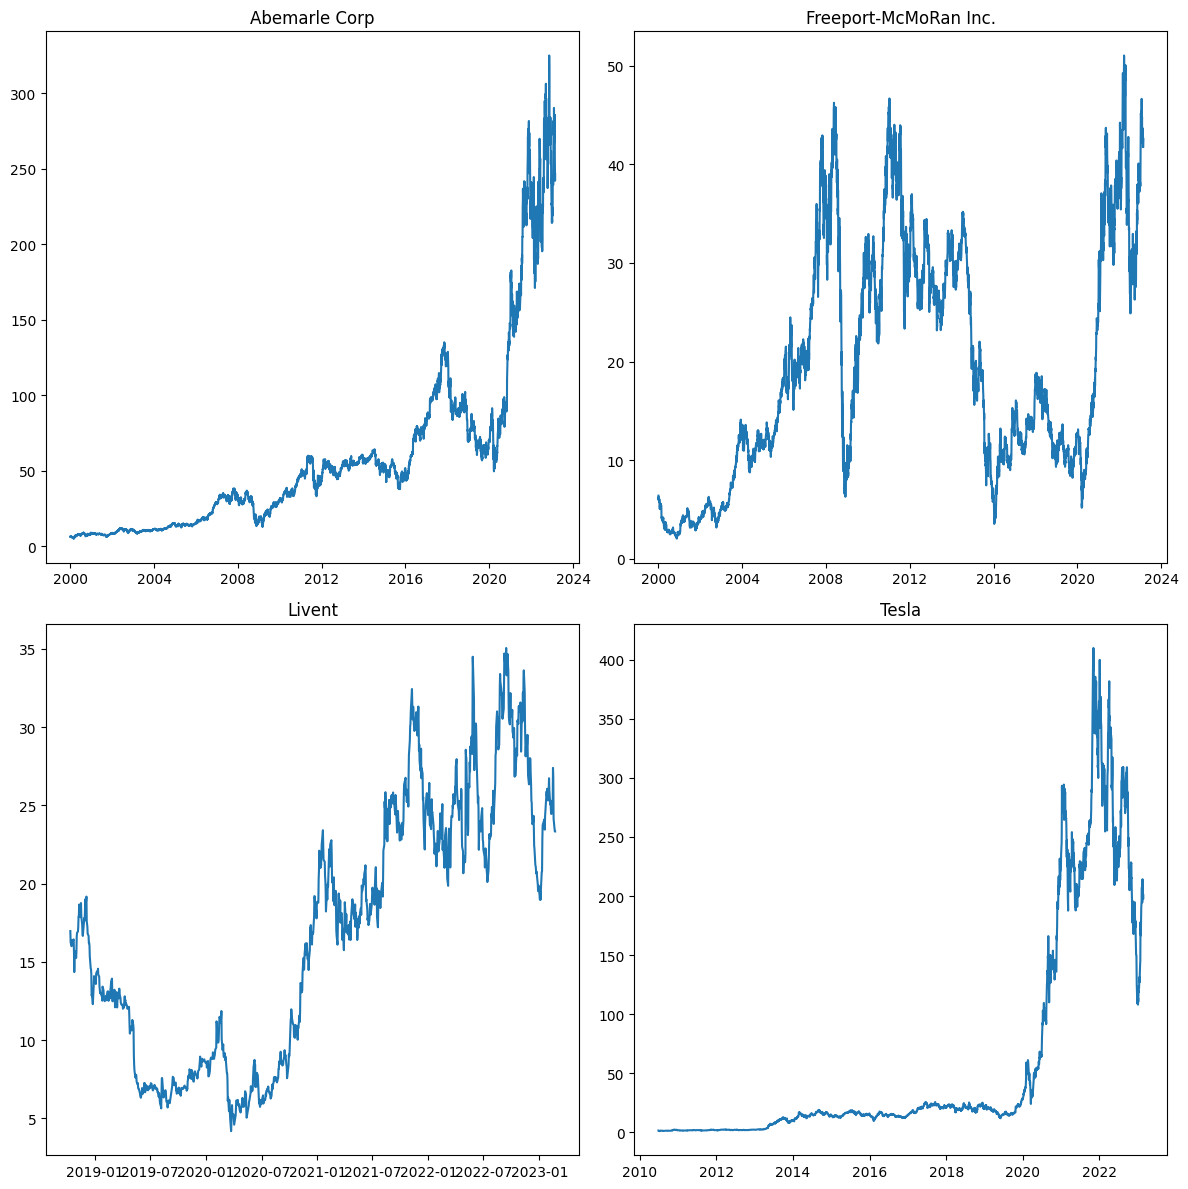

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for i, (name, df) in enumerate(empresas_dict.items()):
    row = i // 2
    col = i % 2
    axs[row, col].plot(df['Date'], df['Adj Close'])
    axs[row, col].set_title(name)  # Título igual al nombre del DataFrame

plt.tight_layout()
plt.show()

VEMOS EN LOS GRAFICOS COMO CRECIERON LAS EMPRESAS DEL 2020 EN ADELANTE

In [25]:
# Concateno para crear un solo DF

empresas = pd.concat((ALB,FCX,LTHM,TSLA))

In [26]:
# Obtengo el retorno diario y el indice de volatilidad para este nuevo DF

empresas['Daily Return'] = empresas['Close'].pct_change()
empresas['Volatility'] = empresas['Daily Return'].rolling(window=180).std() * (252**0.5)

In [27]:
# Descargue un CSV con los precios historicos de distintos minerales

miner = pd.read_csv('./precios-siacam.csv',sep=";", encoding='ANSI')

In [28]:
# Vemos que vino de la siguiente manera, hay que acomodarlo

miner.head()

,Año;Mes;Fecha;Precio;Mineral;Unidad de medida;Numero Índice,Unnamed: 1
0,"1990;1;1990M01;1528,25;Aluminio (Al);Dólar por...",NaN
1,"1990;2;1990M02;1454,28;Aluminio (Al);Dólar por...",NaN
2,"1990;3;1990M03;1567,39;Aluminio (Al);Dólar por...",NaN
3,"1990;4;1990M04;1525,55;Aluminio (Al);Dólar por...",NaN
4,"1990;5;1990M05;1526,93;Aluminio (Al);Dólar por...",NaN


In [29]:
miner[['Año', 'Mes', 'Fecha', 'Precio', 'Mineral', 'UnidadDeMedida', 'NumeroIndice']] = miner['Año;Mes;Fecha;Precio;Mineral;Unidad de medida;Numero Índice'].str.split(';', expand=True)

In [30]:
miner = miner.drop(['Año;Mes;Fecha;Precio;Mineral;Unidad de medida;Numero Índice'], axis=1)

miner.head()

,Unnamed: 1,Año,Mes,Fecha,Precio,Mineral,UnidadDeMedida,NumeroIndice
0,NaN,1990,1,1990M01,"1528,25",Aluminio (Al),Dólar por Tonelada Métrica (USD/t),"82,4423321753016"
1,NaN,1990,2,1990M02,"1454,28",Aluminio (Al),Dólar por Tonelada Métrica (USD/t),"78,4519776449518"
2,NaN,1990,3,1990M03,"1567,39",Aluminio (Al),Dólar por Tonelada Métrica (USD/t),"84,5537621647282"
3,NaN,1990,4,1990M04,"1525,55",Aluminio (Al),Dólar por Tonelada Métrica (USD/t),"82,2966791101137"
4,NaN,1990,5,1990M05,"1526,93",Aluminio (Al),Dólar por Tonelada Métrica (USD/t),"82,3711240100986"


In [31]:
# Descargue de internet un csv que contiene la tasa de interes de EEUU (FED)

tasa_interes = pd.read_csv('./principales-tasas-interes-referencia-principales-economias-mundo-frecuencia-mensual.csv')

In [32]:
tasa_interes.tail()

,indice_tiempo,mro_zonaeuro_tasa,ff_eeuu_tasa,selic_brasil_tasa,repo_inglaterra_tasa,overnight_interest_rate_japon_tasa
1338,2022-07-01,0.50,2.50,13.25,1.25,-0.1
1339,2022-08-01,0.50,2.50,13.75,1.75,-0.1
1340,2022-09-01,1.25,3.25,13.75,2.25,-0.1
1341,2022-10-01,2.00,3.25,13.75,2.25,-0.1
1342,2022-11-01,2.00,4.00,13.75,3.00,-0.1


In [ ]:
# De esta tasa usare el campo FF_euu_tasa para realizar mi dashboard

In [ ]:
# Con las transformaciones realizadas paso todo a CSV para poder usarlos en Power BI

#empresas.to_csv('Empresas_litio.csv')
#matr.to_csv('matr1.csv')
#cons.to_csv('cons1.csv')
#inft.to_csv('inft1.csv')
#gspc.to_csv('gspc1.csv')
#miner.to_csv('minerales.csv')
#Sp500_por_sectores.to_csv('SP500_por_sectores.csv')